In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/work/galaxies.csv")
df

,X,Y
0,6.649504,2.223293
1,5.260232,-7.556045
2,6.164551,9.245618
3,5.033345,9.002009
4,3.674350,-7.836118
...,...,...
995,4.963106,-7.547204
996,6.147833,-8.742696
997,4.722672,9.892131
998,6.333305,2.750708


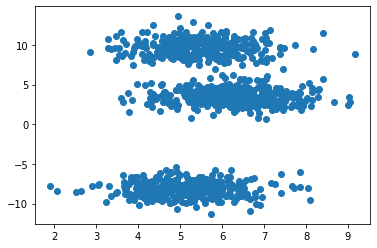

In [4]:
plt.scatter(df["X"],df["Y"])

In [5]:
X=df[["X","Y"]]
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 8)
k_means.fit(X)

KMeans(n_clusters=3, n_init=8)

In [47]:
labels = k_means.labels_
k_means_cluster_centers

array([[ 6.28691709,  3.48728255],
       [ 5.14655134, -8.1909325 ],
       [ 5.46605246,  9.68163004]])

In [57]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers#[:,1].max
np.amax(k_means_cluster_centers)
result = np.where(k_means_cluster_centers == np.amax(k_means_cluster_centers,))

result=int(result[0])
result


2

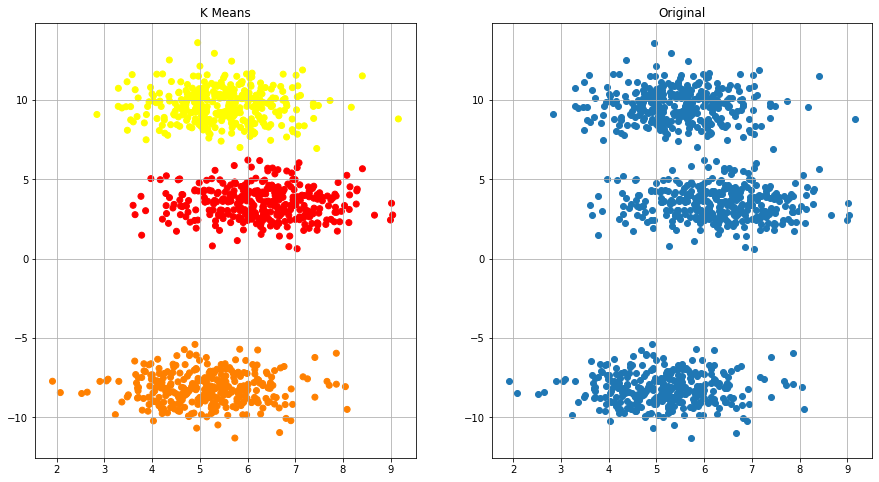

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(df["X"],df["Y"],c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(df["X"],df["Y"])
ax1.grid()
ax2.grid()

In [9]:
df["Labels"]=labels

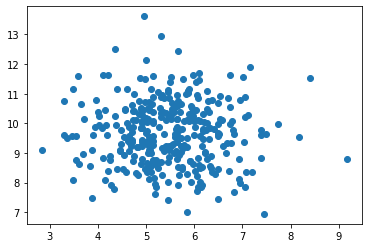

In [58]:
plt.scatter(df.loc[df["Labels"]==result]["X"],df.loc[df["Labels"]==result]["Y"])

In [61]:
x_baby=df.loc[df["Labels"]==result]["X"].max()

In [62]:
y_baby=df.loc[df["X"]==x_baby,"Y"]

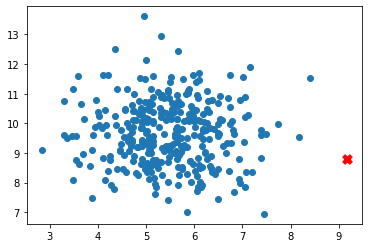

In [63]:
plt.scatter(df.loc[df["Labels"]==result]["X"],df.loc[df["Labels"]==result]["Y"])
plt.scatter(x_baby,y_baby,s=90, c='red', marker='X')

In [14]:
print(x_baby)
print(y_baby)

8.087337403292173
270   -9.499944
Name: Y, dtype: float64


In [15]:
df_new=pd.read_csv("/work/planet.csv")
df_new.head()

,X,Y,Z,Temp,climate
0,-10.577706,2.279242,-0.865452,-8.438929,-9.494053
1,-7.427127,0.176410,-5.588608,-5.443329,-3.629749
2,-7.590300,7.121962,8.955229,-7.675402,8.909423
3,-8.850700,4.544747,0.616561,-7.159618,-8.560698
4,4.680549,-8.821567,5.156382,8.154624,9.046185


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaler = StandardScaler()
pipeline = make_pipeline(scaler, pca)

X_new=df_new[["X","Y","Z","Temp","climate"]].values


components = pipeline.fit_transform(X_new)

In [21]:
components

array([[ 2.04283974, -0.97900928],
       [ 0.89464231, -1.039457  ],
       [ 1.43142213,  1.92441003],
       ...,
       [ 1.96045697, -0.69027658],
       [ 0.57279243,  0.16156641],
       [ 1.60324662,  1.98912451]])

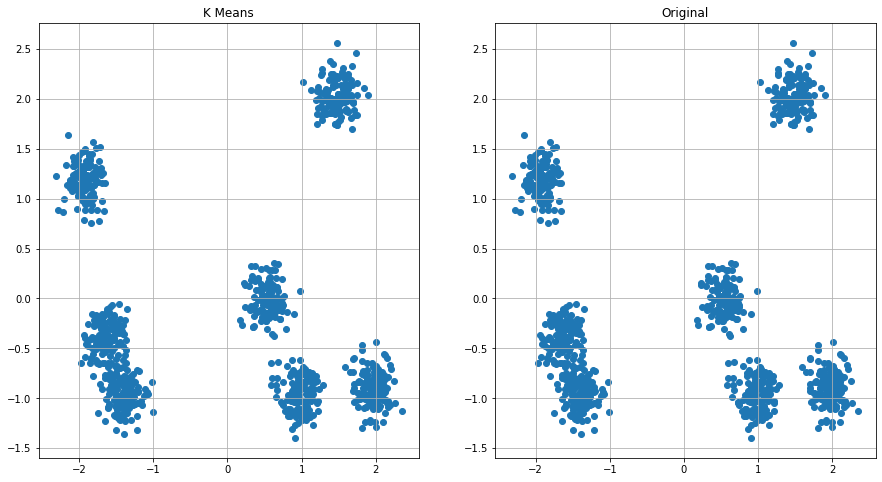

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(components[:,0],components[:,1],)#c=labels,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(components[:,0],components[:,1])
ax1.grid()
ax2.grid()

In [33]:
from sklearn.cluster import KMeans
k_means_new = KMeans(init = "k-means++", n_clusters = 6, n_init = 12)
k_means_new.fit(components)

KMeans(n_clusters=6, n_init=12)

In [64]:
labels_new = k_means.labels_
k_means_cluster_centers_new = k_means.cluster_centers_
k_means_cluster_centers_new

array([[ 6.28691709,  3.48728255],
       [ 5.14655134, -8.1909325 ],
       [ 5.46605246,  9.68163004]])

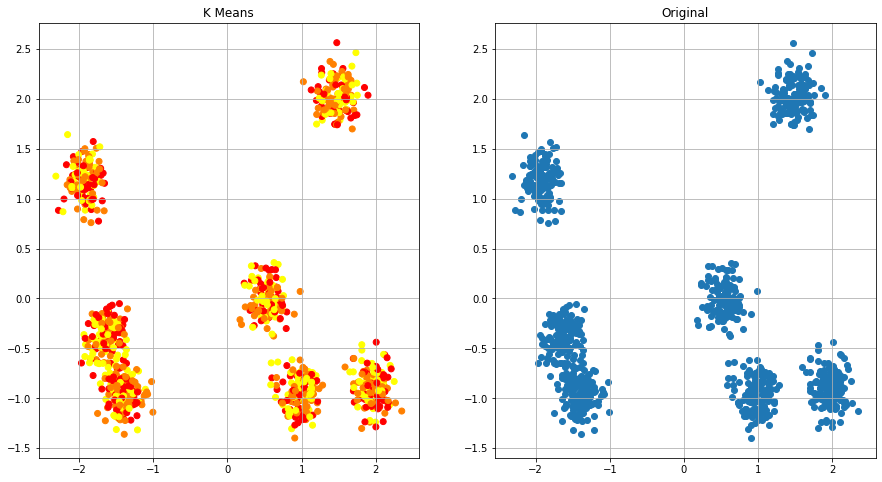

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.set_title('K Means')
ax1.scatter(components[:,0],components[:,1],c=labels_new,cmap='autumn')
ax2.set_title("Original")
ax2.scatter(components[:,0],components[:,1])
ax1.grid()
ax2.grid()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a70149da-7ba5-4906-a687-caea6d00d31b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>